# Diabetes Prediction Using Logistic Regression

__AUTHOR__: RUDHRA (RUDHRA SEETHARAM)

__Variables__ : gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes

__Independent Variables__ : gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level

__Dependent Variable__: diabetes

__Categorical Variables__: gender, hypertension, heart_disease, smoking_history, age, bmi, HbA1c_level, blood_glucose_level, diabetes

Since the dependent variable (diabetes) is categorical, we will use logistic regression.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read diabetes_prediction_dataset.csv
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Getting dummy variables in order to perform logistic regression
# Value for x variable (independent) 
x = df[['age', 'hypertension', 'gender', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

# The independent variables are all categorical variable, therefore we need dummy variables
x = pd.get_dummies(data = x, drop_first = True)
x = x.replace({True: 1, False: 0})
x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,0,1,0,0,0,0


In [4]:
# Value for y variable (dependent variable)
y = df[['diabetes']]
y.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


In [5]:
# Preparing for Logistic Regression
# Train and Test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 13)
(40000, 13)
(60000, 1)
(40000, 1)


In [6]:
# Importing logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=10)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Confusion Matrix
from  sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[36248,   364],
       [ 1300,  2088]])

In [10]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print(accuracy)


95.84


<Axes: >

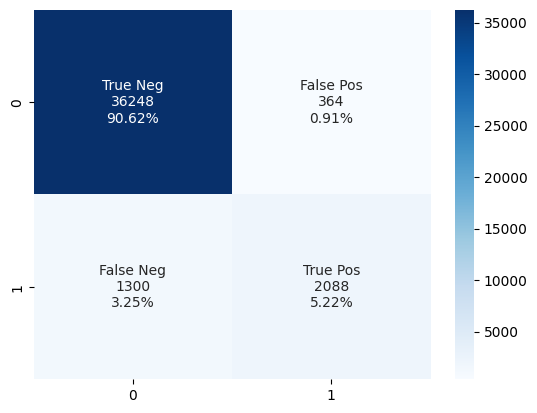

In [11]:
# Visualizing Confusion Matrix (Percentages) using Heat Map
conf_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
conf_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
conf_percentages = ["{0:.2%}".format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(conf_names, conf_counts, conf_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, fmt = '', cmap = 'Blues', annot = labels)

__Interpreting the Confusion Matrix__: 
<br>
* 36248 is the number of negative predictions (0's or no diabetes) that were actually negative (0's or no diabetes)
<br>
* 364 is the number of negative predictions (0's or no diabetes) that were actually positive (1's or with diabetes)
<br>
* 1300 is the number of positive predictions (1's or with diabetes) that were actually negative (0's or no diabetes)
<br>
* 2088 is the number of positive predictions (1's or with diabetes) that were actually positive (1's or with diabetes)
<br>
* Sensitivity = (TP/TP+TN) = (2088/2088+36248) = (2088/38336) = 0.0544
<br>
* Specificity = (TN/TP+TN) = (36248/2088+36248) = (36248/38336) = 0.9455

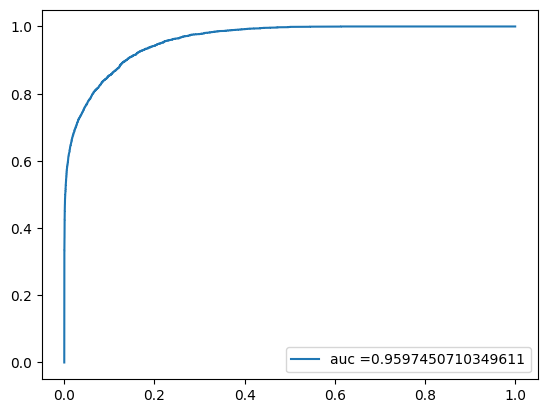

In [13]:
from sklearn import metrics
y_predict_proba = logreg.predict_proba(x_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
auc = metrics.roc_auc_score(y_test, y_predict_proba)
plt.plot(fpr, tpr, label = "auc =" + str(auc))
plt.legend(loc = 4)
plt.show()

__Interpreting the AUC-ROC Curve__:
<br>
The auc is 0.96, shows that the model is a good classifier/predictor.